## This notebook will contain the credits analysis

In [5]:
# Import the libraries that will be used within the code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
from sklearn.preprocessing import StandardScaler


In [6]:
# Data is imported

path = 'C:/Users/j.renza/OneDrive - Solvo a Turia Group Company/Credit Memos Data/'

Clients = pd.read_excel(path + 'Client_Data.xlsx')

Departments = pd.read_excel(path + 'Credit_Reasons_by_Department.xlsx')

Credits = pd.read_excel(path + 'CreditMemos.xlsx')



In [7]:
Clients.head()

,CustomerCode,Client_Name
0,HKSEIN,ESTRELLA SUPERMERCADO
1,HRTIRG,EL MARISCO GRILL LLC
2,HKVPRR,TIENDA MEXICANA EL CHAPARRO
3,NRAFPE,FRONTERA PEACHTREE
4,HKVLIL,LILY'S CARNICERIA


In [8]:
Departments.head()

,CRR,Dpt
0,Not ordered (Sales/TLMKT),Sales
1,Wrong Item (Sales/TLMKT),Sales
2,Wrong Item (Customer),Client
3,Wrong Item (Plant),Warehouse
4,Wrong Brand,Purchasing/Warehouse


In [9]:
Credits.head()

,Date,CreditReason,CustomerCode,State,CountInvoice,NetWeight,Sales
0,2018-01-02,Wrong Item (Sales/TLMKT),HKSEIN,SC,1,40.00,127.60
1,2018-01-02,Wrong Item (Sales/TLMKT),HRTIRG,TN,1,66.00,164.34
2,2018-01-02,Wrong Item (Customer),HKVPRR,VA,1,40.50,32.00
3,2018-01-02,Wrong Item (Customer),NRAFPE,GA,1,7.14,121.49
4,2018-01-02,Wrong Brand,HKVLIL,VA,1,341.70,1844.84


In [10]:
# Credits by Month

init_date = '2023-06-01'

end_date = '2023-06-30'

In [11]:
CreditsJune2023 = Credits[(Credits.Date >= init_date) & (Credits.Date <= end_date)]

CreditsJune2023.reset_index(drop = True, inplace = True)

In [12]:
Temp1 = CreditsJune2023.merge(Clients, right_on = 'CustomerCode', left_on = 'CustomerCode', how = 'inner')

In [13]:
CreditsJune2023 = Temp1.merge(Departments, right_on = 'CRR', left_on = 'CreditReason', how = 'inner')

In [14]:
CreditsJune2023 = CreditsJune2023[['Date', 'CRR', 'CustomerCode', 'Client_Name', 'State', 'CountInvoice', 'NetWeight', 'Sales', 'Dpt']]

In [15]:
CreditsJune2023.head()

,Date,CRR,CustomerCode,Client_Name,State,CountInvoice,NetWeight,Sales,Dpt
0,2023-06-01,Not ordered (Sales/TLMKT),HRKTOQ,JALISCO EL TOQUE CHINGON,KY,1,70.2,420.50,Sales
1,2023-06-05,Not ordered (Sales/TLMKT),NRAFPE,FRONTERA PEACHTREE,GA,1,20.0,60.02,Sales
2,2023-06-06,Not ordered (Sales/TLMKT),HKFEXI,TIENDA LA MEXICANA INC,FL,1,55.0,133.47,Sales
3,2023-06-06,Not ordered (Sales/TLMKT),HKNAOM,FIESTA FOOD MARKET,NC,1,260.0,1105.00,Sales
4,2023-06-06,Not ordered (Sales/TLMKT),HRGAL3,SALSAS #3,GA,1,20.0,84.80,Sales


In [16]:
round(CreditsJune2023.Sales.sum(),2)

245092.97

In [17]:
SpoilageCustomer = CreditsJune2023[CreditsJune2023.CRR == 'Spoilage - Customer']

In [18]:
SpoilageCustomer.Sales.sum()

26604.22

In [19]:
SpoilageCustomer.Sales.sum()/CreditsJune2023.Sales.sum()

0.10854746262204093

In [20]:
dataSC = SpoilageCustomer.groupby(by = 'State', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

In [21]:
5881.66/SpoilageCustomer.Sales.sum()

0.22107996400571037

### Spoilage - Customer

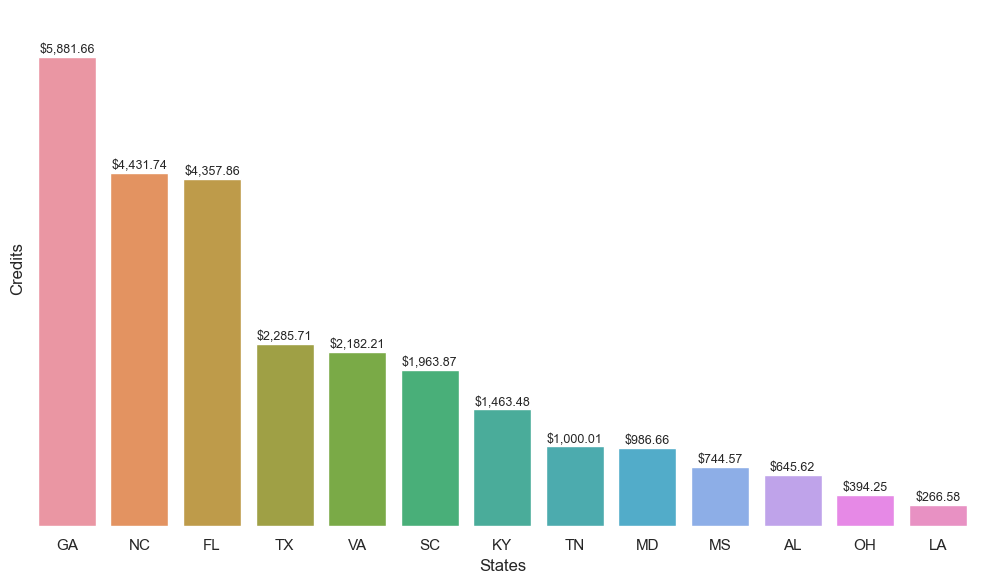

In [22]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='State', y='Sales', data=dataSC)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('States')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=dataSC['Sales'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('SCbyState.jpg')

plt.show()

## Bad Appearance

In [23]:
CreditsJune2023.CRR.unique()

array(['Not ordered (Sales/TLMKT)', 'Wrong Item (Sales/TLMKT)',
       'Spoilage - Customer', 'Not In Truck', 'Ordered, But Not Wanted',
       'Substituted, Rejected for Cust', 'Old CM, Not Notified.',
       'Inadequate Expiration Date', 'Wrongly Invoiced',
       'Maltreated/Mold', 'Not In Truck/End Route',
       'Not In Truck/Wrong Customer', 'Wrong Item (Plant)',
       'Wrong Item (Customer)', 'Wrong Brand', 'Unfinished Route',
       'Cut Out Of Specs (Processing)', 'Bad Appearance',
       'Business Closed', 'Not In Time', 'Weight Not Required',
       'Billing Error', 'Not In Truck/Wrong Truck',
       'Customer Has Too Much', 'Recall'], dtype=object)

In [24]:
BadAppearance = CreditsJune2023[CreditsJune2023.CRR == 'Bad Appearance']

In [25]:
BadAppearance.Sales.sum()

16807.6

In [26]:
BadAppearance.Sales.sum()/CreditsJune2023.Sales.sum()

0.0685764263250798

In [27]:
dataBA = BadAppearance.groupby(by = 'State', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

In [28]:
15168.53/BadAppearance.Sales.sum()

0.9024804255217879

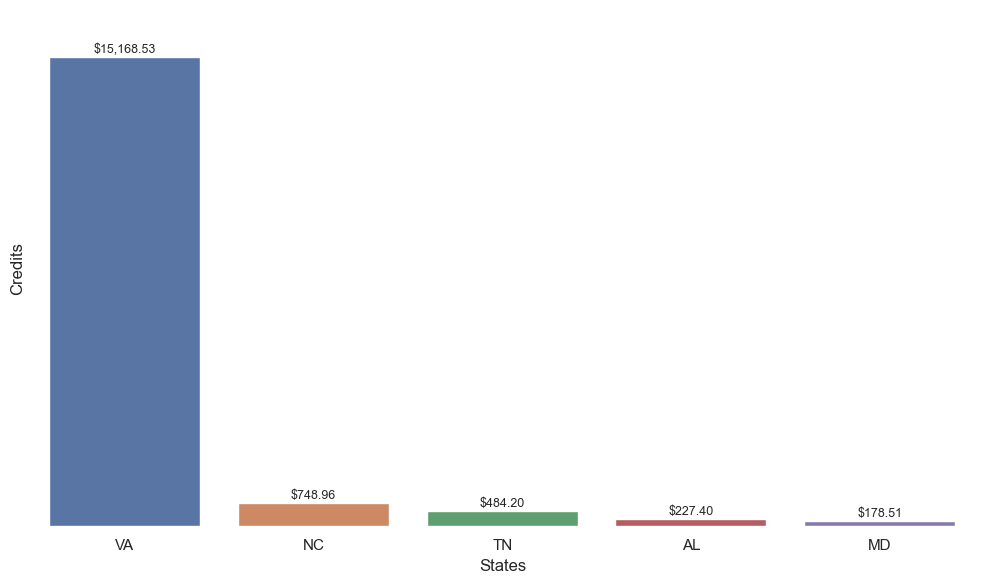

In [29]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='State', y='Sales', data=dataBA)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('States')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=dataBA['Sales'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('BAbyState.jpg')

plt.show()

## Spoilage PM

In [30]:
SpoilagePM = CreditsJune2023[CreditsJune2023.CRR == 'Spoilage PM']

In [31]:
SpoilagePM

,Date,CRR,CustomerCode,Client_Name,State,CountInvoice,NetWeight,Sales,Dpt


## Statistical Behavior

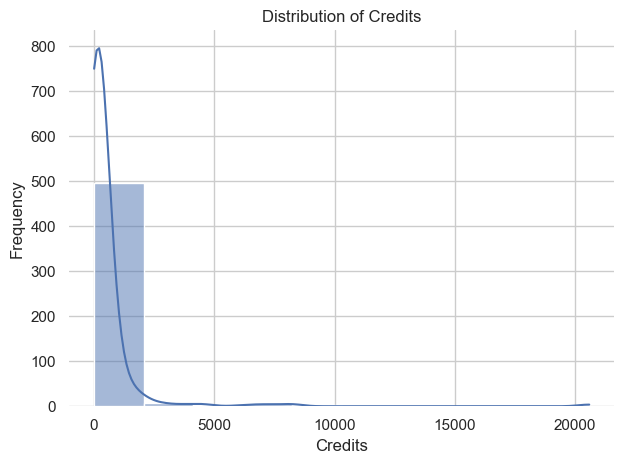

In [32]:
# Creating the histogram
sns.histplot(data= CreditsJune2023, x ='Sales', bins=10, kde=True)

# Customizing the plot
plt.title('Distribution of Credits')  # Adding a title to the plot
plt.xlabel('Credits')  # Adding a label to the x-axis
plt.ylabel('Frequency')  # Adding a label to the y-axis

# plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('HistogramCredits2023.jpg')
plt.show()

In [80]:
#  Scatterplot Sales Vs Credits

Sales = pd.read_excel(path + 'Sales2023.xlsx')

In [35]:
Sales.head()

,Date,Day,Sales
0,2023-06-01,Thursday,988514.90
1,2023-06-02,Friday,642032.07
2,2023-06-03,Saturday,73019.70
3,2023-06-04,Sunday,313163.97
4,2023-06-05,Monday,1068661.16


In [36]:
CreditsJune2023.rename(columns= {'Sales': 'Credits'}, inplace = True)

In [37]:
CreditsJune = CreditsJune2023.groupby(by = 'Date', as_index = False)['Credits'].sum()

In [48]:
CreditsSalesJune2023 = CreditsJune.merge(Sales, right_on = 'Date', left_on = 'Date', how = 'right')

In [49]:
CreditsSalesJune2023 = CreditsSalesJune2023[['Date', 'Credits', 'Sales']] 

In [50]:
CreditsSalesJune2023.head()

,Date,Credits,Sales
0,2023-06-01,20570.03,988514.90
1,2023-06-02,1706.28,642032.07
2,2023-06-03,5426.64,73019.70
3,2023-06-04,NaN,313163.97
4,2023-06-05,11010.77,1068661.16


In [51]:
# Selecting columns to standardize
columns_to_standardize = ['Credits', 'Sales']

# Standardizing the values
scaler = StandardScaler()
CreditsSalesJune2023[columns_to_standardize] = scaler.fit_transform(CreditsSalesJune2023[columns_to_standardize])

In [54]:
CreditsSalesJune2023 = CreditsSalesJune2023.fillna(0)

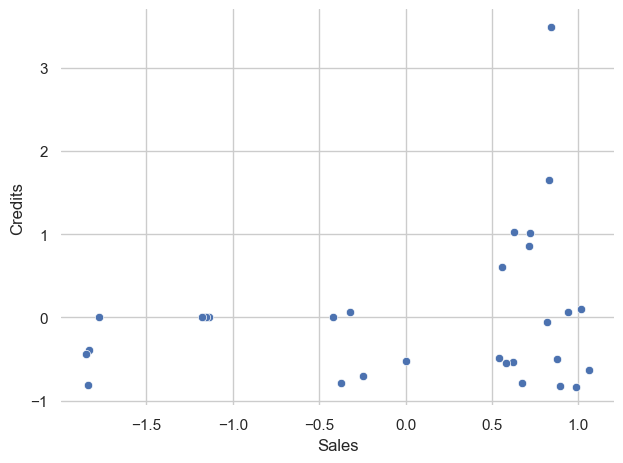

In [58]:
# Creating the scatterplot
sns.scatterplot(x='Sales', y='Credits', data=CreditsSalesJune2023)

# Customizing the plot
# plt.title('Scatterplot')  # Adding a title to the plot
plt.xlabel('Sales')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the y-axis

sns.despine(top=True, right=True, left=True, bottom=True)

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing

plt.savefig('ScatterSales.jpg')
plt.show()

### Variación de créditos en el año

In [87]:
Credits2023 = Credits[(Credits.Date >= '2023-01-01') & (Credits.Date <= '2023-06-30')]

Credits2023.reset_index(drop = True, inplace = True)

In [89]:
Credits2023 = Credits2023.rename(columns = {'Sales': 'Credits'})

In [92]:
Credits2023 = Credits2023[(Credits2023.CreditReason == 'Spoilage - Customer')| (Credits2023.CreditReason == 'Bad Appearance')]

In [94]:
Credits2023 = Credits2023[['Date', 'Credits']]

In [96]:
Credits2023 = Credits2023.groupby(by = 'Date', as_index = False)['Credits'].sum()

In [98]:
# Group the dataframe by month
Credits2023 = Credits2023.groupby(pd.Grouper(key='Date', freq='M')).sum()

# Reset the index to make the 'date' column a regular column instead of the index
Credits2023 = Credits2023.reset_index()

In [99]:
Credits2023

,Date,Credits
0,2023-01-31,33772.42
1,2023-02-28,21193.05
2,2023-03-31,21385.85
3,2023-04-30,39247.88
4,2023-05-31,35906.35
5,2023-06-30,43411.82


In [105]:
(45411.82/35906.35) -1


0.2647294977072301

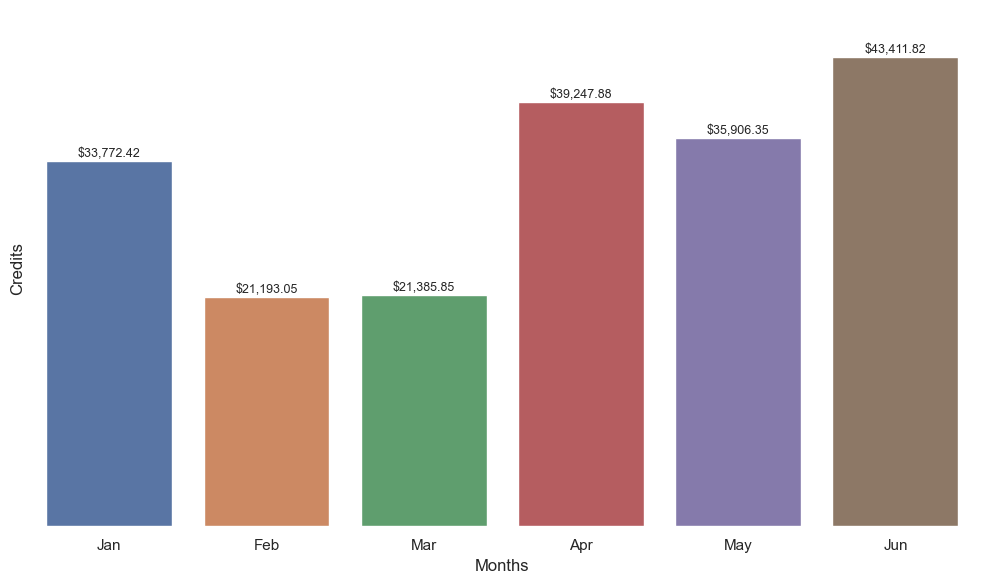

In [102]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
ax = sns.barplot(x='Date', y='Credits', data=Credits2023)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    label = locale.currency(height, grouping=True)  # Format label as currency
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize = 9)

# Customizing the plot
# plt.title('Credits by State')  # Adding a title to the plot
plt.xlabel('Months')  # Adding a label to the x-axis
plt.ylabel('Credits')  # Adding a label to the x-axis

x_labels = Credits2023['Date'].dt.strftime('%b')  # Custom format for month labels
plt.xticks(range(len(Credits2023['Date'])), x_labels, rotation=0)

plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

# Adjusting the ylim to accommodate the labels
plt.ylim(top=Credits2023['Credits'].max() * 1.1)  # Increase the y-axis limit for labels

# Displaying the plot
plt.tight_layout()  # Adjusting the spacing
plt.savefig('CreditsbyMonth.jpg')

plt.show()